In [27]:
import pandas as pd

In [28]:
data=pd.read_csv("/home/placement/Downloads/fiat500.csv")

In [29]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [30]:
data2=data.drop(['ID','lat','lon'],axis=1)

In [31]:
data2

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [32]:
data2=pd.get_dummies(data2)

In [33]:
data2

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [34]:
data2.shape

(1538, 8)

In [35]:
y=data2['price']#predicted value removed from data frame
x=data2.drop(['price'],axis=1)

In [36]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [37]:
x

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1
3,51,2739,160000,1,1,0,0
4,73,3074,106880,1,0,1,0
...,...,...,...,...,...,...,...
1533,51,3712,115280,1,0,0,1
1534,74,3835,112000,1,1,0,0
1535,51,2223,60457,1,0,1,0
1536,51,2557,80750,1,1,0,0


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [39]:
data3=data2.loc[(data.model=='lounge')]

In [40]:
data3

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
3,51,2739,160000,1,6000,1,0,0
6,51,731,11600,1,10750,1,0,0
7,51,1521,49076,1,9190,1,0,0
11,51,366,17500,1,10990,1,0,0
...,...,...,...,...,...,...,...,...
1528,51,2861,126000,1,5500,1,0,0
1529,51,731,22551,1,9900,1,0,0
1530,51,670,29000,1,10800,1,0,0
1534,74,3835,112000,1,4600,1,0,0


In [41]:
data3=pd.get_dummies(data3)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
ridge_regressor.best_params_

{'alpha': 30}

In [45]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error


579521.7970897449

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8421969385523054

In [48]:
Results=pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_ridge
Results=Results.reset_index()
Results['ID']=Results.index #replaces id with index number
Results.head(10)

,index,Actual,Predicted,ID
0,481,7900,5869.741155,0
1,76,7900,7149.563327,1
2,1502,9400,9862.785355,2
3,669,8500,9719.283532,3
4,1409,9700,10035.895686,4
5,1414,9900,9650.311090,5
6,1089,9900,9669.183317,6
7,1507,9950,10115.128380,7
8,970,10700,9900.241944,8
9,1198,8999,9347.080772,9


<Axes: xlabel='ID', ylabel='Actual'>

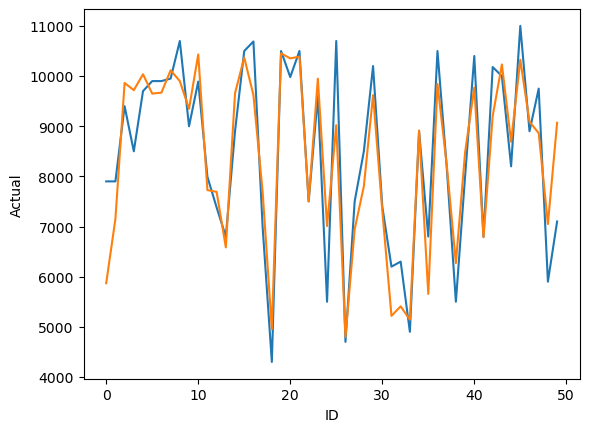

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='Actual',data=Results.head(50)) #red is actual
sns.lineplot(x='ID',y='Predicted',data=Results.head(50)) #blue is predicted